What is time seris?
Time series is data is collected over period of time.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
#displaly just below. will avoid plt.show()
%matplotlib inline

In [33]:
birthdata = pd.read_csv('E:\Amila\Amila\Predictive Analytics\L&D\Births2015.csv',index_col = [0] , parse_dates = [0])

In [34]:
birthdata.head()

,births
date,
2015-01-01,8068
2015-01-02,10850
2015-01-03,8328
2015-01-04,7065
2015-01-05,11892


In [17]:
#give stat of dataset
birthdata.describe()

,births
count,365.000000
mean,10899.991781
std,2076.683881
min,6515.000000
25%,8431.000000
50%,11883.000000
75%,12339.000000
max,13949.000000


In [18]:
birthdata.tail()

,births
date,
2015-12-27,7518
2015-12-28,13100
2015-12-29,13458
2015-12-30,13100
2015-12-31,11608


In [14]:
type(birthdata)

pandas.core.frame.DataFrame

In [15]:
#convert to datafarame to a array / This could done by initializing "squees = true"  in read elemet
birthdataSeries = birthdata.values

<AxesSubplot:xlabel='date'>

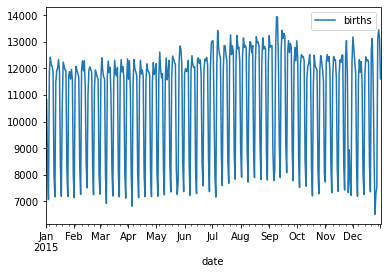

In [19]:
birthdata.plot()

In [25]:
#get 20 day rolling meanv( moving average)
birthdata_mean = birthdata.rolling( window = 20).mean()

In [16]:
type(birthdataSeries)

numpy.ndarray

In [41]:
birthdataSeries

array([[ 8068],
       [10850],
       [ 8328],
       [ 7065],
       [11892],
       [12425],
       [12141],
       [12094],
       [11868],
       [ 8014],
       [ 7172],
       [11479],
       [11924],
       [12013],
       [12339],
       [11861],
       [ 8280],
       [ 7195],
       [10602],
       [12242],
       [12086],
       [11949],
       [11910],
       [ 8235],
       [ 7186],
       [11728],
       [11882],
       [11602],
       [11967],
       [11571],
       [ 7987],
       [ 7139],
       [11480],
       [12079],
       [11924],
       [11821],
       [11656],
       [ 8285],
       [ 7265],
       [11937],
       [12291],
       [11911],
       [12285],
       [11321],
       [ 8390],
       [ 7508],
       [11038],
       [11952],
       [12061],
       [11968],
       [11864],
       [ 8343],
       [ 7254],
       [11260],
       [11941],
       [11828],
       [11672],
       [11596],
       [ 7989],
       [ 7273],
       [11609],
       [12402],
       [

This moving average will remove the noice of the original data set

<AxesSubplot:xlabel='date'>

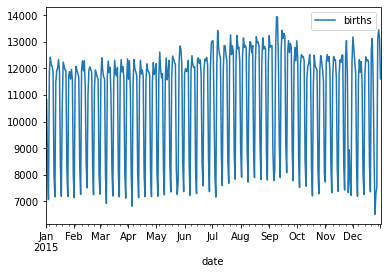

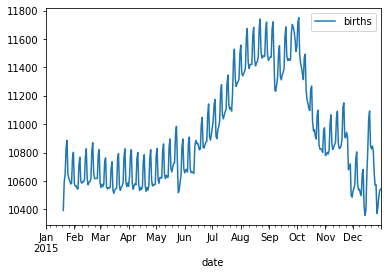

In [27]:
birthdata.plot()
birthdata_mean.plot()

get predicted next valu by shifting data by one position

In [44]:
val = pd.DataFrame(birthdataSeries) 

In [70]:
birthdata_next = pd.concat([val ,val.shift(1)],axis =1)

In [71]:
birthdata_next = birthdata_next[1:]

In [72]:
birthdata_next

,0,0
1,10850,8068.0
2,8328,10850.0
3,7065,8328.0
4,11892,7065.0
5,12425,11892.0
...,...,...
360,7518,7294.0
361,13100,7518.0
362,13458,13100.0
363,13100,13458.0


In [73]:
birthdata_next = pd.DataFrame(birthdata_next)

In [74]:
birthdata_next

,0,0
1,10850,8068.0
2,8328,10850.0
3,7065,8328.0
4,11892,7065.0
5,12425,11892.0
...,...,...
360,7518,7294.0
361,13100,7518.0
362,13458,13100.0
363,13100,13458.0


In [77]:
birthdata_next.columns = ['actual','predicted']

In [78]:
birthdata_next

,actual,predicted
1,10850,8068.0
2,8328,10850.0
3,7065,8328.0
4,11892,7065.0
5,12425,11892.0
...,...,...
360,7518,7294.0
361,13100,7518.0
362,13458,13100.0
363,13100,13458.0


In [85]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [82]:
birthdata_next_error = mean_squared_error(birthdata_next.actual , birthdata_next.predicted)

In [83]:
birthdata_next_error

5162403.576923077

In [86]:
birthdata_next_error = np.sqrt(birthdata_next_error)

In [87]:
birthdata_next_error

2272.092334594498

This a one base line model. Only with shift current value get 2272 error.
The std of data set is = 2076 and we come close vale to that which is 2272